## Transformée de Fourier

In [10]:
import matplotlib.pyplot as plt

import numpy as np
from numpy import pi

In [5]:
def f(t):
    return 1/(1+0.99*np.cos(2*pi*t))

In [25]:
Delta_t = 1/100
T = 1
N = int(T/Delta_t)



In [26]:
t_mesure = np.arange(N)*Delta_t
t_mesure

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

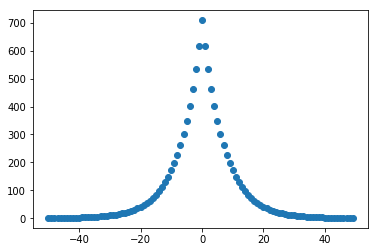

In [27]:
from numpy.fft import fft
from numpy.fft import fftfreq

y = f(t_mesure)
y_tilde = fft(y)
freqs = fftfreq(N, Delta_t)
plt.plot(freqs, np.abs(y_tilde), 'o')

(-5, 5)

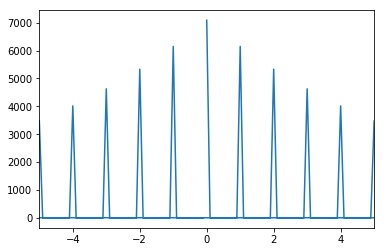

In [31]:
Delta_t = 1/100
T = 10
N = int(T/Delta_t)
t_mesure = np.arange(N)*Delta_t

y = f(t_mesure)
y_tilde = fft(y)
freqs = fftfreq(N, Delta_t)
plt.plot(freqs, np.abs(y_tilde), '')
plt.xlim(-5, 5)

## Introduction aux fenêtres

(200, 300)

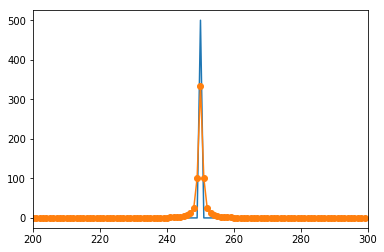

In [39]:
Delta_t = 1/1000
T = 1
N = 1000

t_mesure = np.arange(N)*Delta_t

fenetre = 4*t_mesure*(T-t_mesure)/T**2


f = 250
y = np.sin(2*pi*f*t_mesure)
y_tilde = fft(y)
y_tilde_fenetre = fft(y*fenetre)
freqs = fftfreq(N, Delta_t)

mask = (freqs>=200) & (freqs<300)
plt.plot(freqs[mask], np.abs(y_tilde[mask]))
plt.plot(freqs[mask], np.abs(y_tilde_fenetre[mask]), '-o')
plt.xlim(200, 300)


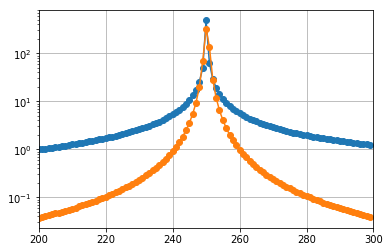

In [42]:
Delta_t = 1/1000
T = 1
N = 1000

t_mesure = np.arange(N)*Delta_t


f = 250.112334
y = np.sin(2*pi*f*t_mesure)
y_tilde = fft(y)
y_tilde_fenetre = fft(y*fenetre)

freqs = fftfreq(N, Delta_t)

mask = (freqs>=200) & (freqs<300)
plt.semilogy(freqs[mask], np.abs(y_tilde[mask]), '-o')
plt.semilogy(freqs[mask], np.abs(y_tilde_fenetre[mask]), '-o')
plt.xlim(200, 300)
plt.grid()

## Filtres en Python

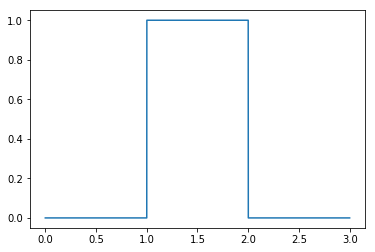

In [56]:
samplerate = 44100
Delta_t = 1/samplerate
N = samplerate*3
signal = np.zeros(N)
signal[samplerate:2*samplerate] = 1
t_mesure = np.arange(N)*Delta_t
plt.plot(t_mesure, signal)

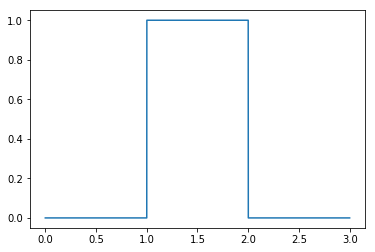

In [59]:
from numpy.fft import rfft, irfft, rfftfreq

signal_tilde = rfft(signal)
signal_2 = irfft(signal_tilde)
plt.plot(t_mesure, signal_2)

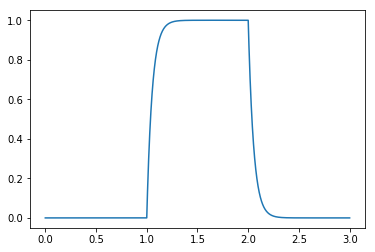

In [73]:
def passe_bas(signal, f_c, samplerate=44100):
    signal_tilde = rfft(signal)
    freqs = rfftfreq(len(signal), 1/samplerate)
    signal_tilde = signal_tilde /(1  + 1J*freqs/f_c)
    signal_2 = irfft(signal_tilde)
    return signal_2


plt.plot(t_mesure, passe_bas(signal, 3))

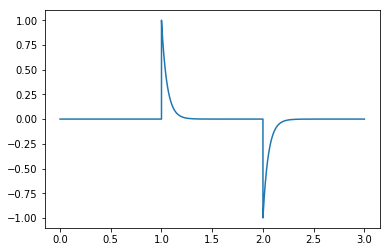

In [62]:
def passe_haut(signal, f_c, samplerate=44100):
    signal_tilde = rfft(signal)
    freqs = rfftfreq(len(signal), 1/samplerate)
    signal_tilde = signal_tilde /(1+1J*freqs/f_c)*1J*(freqs/f_c)
    signal_2 = irfft(signal_tilde)
    return signal_2

plt.plot(t_mesure, passe_haut(signal, 3))